In [25]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ML/updated/ACI_HistoricalPrices - ACI_HistoricalPrices.csv')

In [26]:
df

,Date,Open,High,Low,Close,Volume
0,1997-07-07,15.44,15.44,15.44,15.44,52691.85443
1,1997-07-09,15.66,15.66,15.66,15.66,20513.62272
2,1997-07-10,15.53,15.53,15.53,15.53,11262.38110
3,1997-07-14,14.52,14.52,14.52,14.52,30167.09223
4,1997-07-16,14.67,14.67,14.67,14.67,45853.98019
...,...,...,...,...,...,...
4530,2022-08-03,277.50,279.10,276.70,277.10,51452.00000
4531,2022-08-04,278.70,278.70,275.40,276.70,45600.00000
4532,2022-08-08,279.90,279.90,275.70,277.80,28651.00000
4533,2022-08-10,277.00,277.00,273.60,273.90,39391.00000


In [27]:
df = df[['Date', 'Close']]
df.head(10)

,Date,Close
0,1997-07-07,15.44
1,1997-07-09,15.66
2,1997-07-10,15.53
3,1997-07-14,14.52
4,1997-07-16,14.67
5,1997-07-17,14.90
6,1997-07-21,13.78
7,1997-07-22,13.91
8,1997-07-23,14.11
9,1997-07-28,16.07


In [28]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1998-08-23')
datetime_object

datetime.datetime(1998, 8, 23, 0, 0)

In [29]:
df['Date'] = df['Date'].apply(str_to_datetime)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
df['Date']

0      1997-07-07
1      1997-07-09
2      1997-07-10
3      1997-07-14
4      1997-07-16
          ...    
4530   2022-08-03
4531   2022-08-04
4532   2022-08-08
4533   2022-08-10
4534   2022-08-11
Name: Date, Length: 4535, dtype: datetime64[ns]

In [31]:
df.index = df.pop('Date')

In [32]:
df.index

DatetimeIndex(['1997-07-07', '1997-07-09', '1997-07-10', '1997-07-14',
               '1997-07-16', '1997-07-17', '1997-07-21', '1997-07-22',
               '1997-07-23', '1997-07-28',
               ...
               '2022-07-26', '2022-07-27', '2022-07-28', '2022-08-01',
               '2022-08-02', '2022-08-03', '2022-08-04', '2022-08-08',
               '2022-08-10', '2022-08-11'],
              dtype='datetime64[ns]', name='Date', length=4535, freq=None)

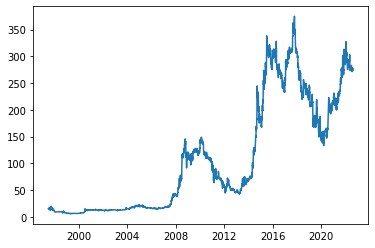

In [33]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [34]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  print(target_date)
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+2)
    print(df_subset)
    
    if len(df_subset) != n+2:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=100)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n+1):
    X[:, i]
    ret_df[f'Target-{n+1-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df



In [35]:
# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '1998-08-23', 
                                '2022-08-11',                         
                                n=5)
windowed_df

Streaming output truncated to the last 5000 lines.
2019-07-25  171.85
2019-07-29  175.01
2019-07-30  174.60
2019-07-31  175.56
2019-08-01  177.35
             Close
Date              
2019-07-24  172.33
2019-07-25  171.85
2019-07-29  175.01
2019-07-30  174.60
2019-07-31  175.56
2019-08-01  177.35
2019-08-05  174.26
             Close
Date              
2019-07-25  171.85
2019-07-29  175.01
2019-07-30  174.60
2019-07-31  175.56
2019-08-01  177.35
2019-08-05  174.26
2019-08-06  178.45
             Close
Date              
2019-07-29  175.01
2019-07-30  174.60
2019-07-31  175.56
2019-08-01  177.35
2019-08-05  174.26
2019-08-06  178.45
2019-08-07  187.11
             Close
Date              
2019-07-30  174.60
2019-07-31  175.56
2019-08-01  177.35
2019-08-05  174.26
2019-08-06  178.45
2019-08-07  187.11
2019-08-08  191.17
             Close
Date              
2019-07-31  175.56
2019-08-01  177.35
2019-08-05  174.26
2019-08-06  178.45
2019-08-07  187.11
2019-08-08  191.17
2019-08-19  218.87

,Target Date,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,1998-08-23,9.21,9.26,9.46,9.40,9.41,9.40,8.29
1,1998-08-25,9.46,9.40,9.41,9.40,8.29,7.90,7.69
2,1998-08-26,9.40,9.41,9.40,8.29,7.90,7.69,7.55
3,1998-08-27,9.41,9.40,8.29,7.90,7.69,7.55,7.50
4,1998-08-31,9.40,8.29,7.90,7.69,7.55,7.50,7.48
...,...,...,...,...,...,...,...,...
4450,2022-08-03,276.40,274.00,271.70,271.50,273.70,276.70,277.10
4451,2022-08-04,274.00,271.70,271.50,273.70,276.70,277.10,276.70
4452,2022-08-08,271.70,271.50,273.70,276.70,277.10,276.70,277.80
4453,2022-08-10,271.50,273.70,276.70,277.10,276.70,277.80,273.90


In [36]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((4455,), (4455, 6, 1), (4455,))

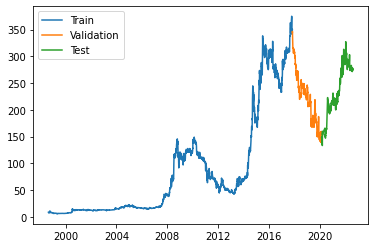

In [37]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90,]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((6, 1)),
                    layers.LSTM(128),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
112/112 [==============================] - 10s 34ms/step - loss: 4950.3447 - mean_absolute_error: 32.6791 - val_loss: 65.6578 - val_mean_absolute_error: 6.7759
Epoch 2/100
112/112 [==============================] - 2s 19ms/step - loss: 18.6344 - mean_absolute_error: 2.2368 - val_loss: 40.1438 - val_mean_absolute_error: 4.8565
Epoch 3/100
112/112 [==============================] - 1s 10ms/step - loss: 18.0982 - mean_absolute_error: 2.2744 - val_loss: 153.1838 - val_mean_absolute_error: 11.2092
Epoch 4/100
112/112 [==============================] - 1s 11ms/step - loss: 22.9535 - mean_absolute_error: 2.4750 - val_loss: 168.8725 - val_mean_absolute_error: 12.0821
Epoch 5/100
112/112 [==============================] - 1s 11ms/step - loss: 19.2797 - mean_absolute_error: 2.2964 - val_loss: 38.2481 - val_mean_absolute_error: 4.5954
Epoch 6/100
112/112 [==============================] - 1s 11ms/step - loss: 13.3708 - mean_absolute_error: 1.8996 - val_loss: 40.8242 - val_mean_absolut

In [39]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 128)               66560     
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 64)                4160      
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dense_19 (Dense)            (None, 64)                4160      
                                                                 
 dense_20 (Dense)            (None, 1)                

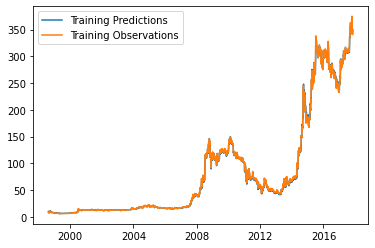

In [40]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

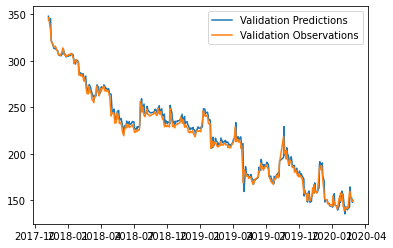

In [41]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

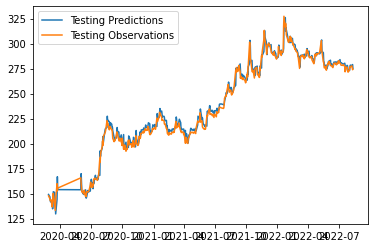

In [42]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

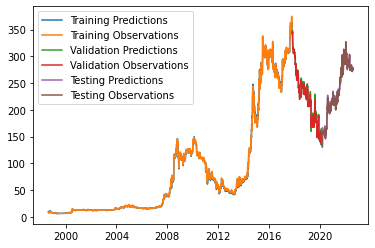

In [43]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [44]:
# from keras.layers.core import Dense , Dropout
# from keras import regularizers
